In [156]:
import pandas as pd
import numpy as np
import seaborn as sbn
import tensorflow as tf
import matplotlib.pyplot as plt 

In [157]:
arabaDataFrame = pd.read_excel("merc.xlsx")

In [158]:
arabaDataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [159]:
arabaDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [160]:
arabaDataFrame.isnull().sum()   # BOŞ DEĞER VAR MI KONTROL ETMELİYİZ

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

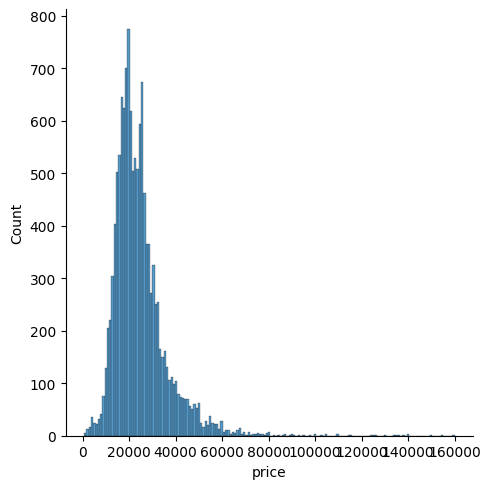

In [161]:
sbn.displot(arabaDataFrame["price"])

<Axes: xlabel='year', ylabel='count'>

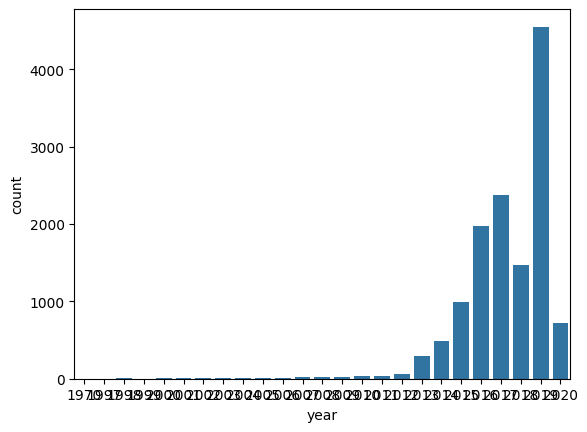

In [162]:
sbn.countplot(x="year", data=arabaDataFrame)

In [163]:
print(arabaDataFrame.corr)

<bound method DataFrame.corr of        year  price transmission  mileage  tax   mpg  engineSize
0      2005   5200    Automatic    63000  325  32.1         1.8
1      2017  34948    Automatic    27000   20  61.4         2.1
2      2016  49948    Automatic     6200  555  28.0         5.5
3      2016  61948    Automatic    16000  325  30.4         4.0
4      2016  73948    Automatic     4000  325  30.1         4.0
...     ...    ...          ...      ...  ...   ...         ...
13114  2020  35999    Automatic      500  145  55.4         2.0
13115  2020  24699    Automatic     2500  145  55.4         2.0
13116  2019  30999    Automatic    11612  145  41.5         2.1
13117  2019  37990    Automatic     2426  145  45.6         2.0
13118  2019  54999    Automatic     2075  145  52.3         2.9

[13119 rows x 7 columns]>


In [164]:
arabaDataFrame.select_dtypes(include="number").corr()["price"].sort_values()
# arabaDataFrame de string değerler de olduğu için corr() işlemi yapılamaz
# bu yüzden select_dtypes(include="number") ile sadece sayısal değer içeren satırları aldık 

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

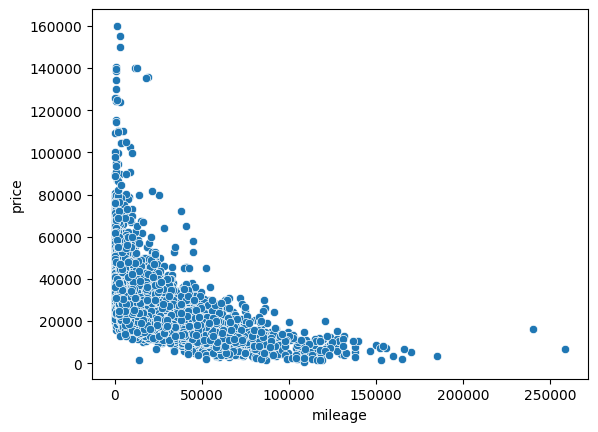

In [165]:
sbn.scatterplot(x="mileage",y="price",data = arabaDataFrame)

In [166]:
arabaDataFrame.sort_values("price",ascending=False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [167]:
arabaDataFrame.sort_values("price",ascending=True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11808,1998,1990,Automatic,113557,265,32.1,2.3


In [168]:
len(arabaDataFrame)

13119

In [169]:
len(arabaDataFrame) * 0.01

131.19

EN YÜKSEK FİYATLI 131 VERİYİ ATARAK ÇALIŞACAĞIZ

In [170]:
yuzdeDoksanDokuzDf = arabaDataFrame.sort_values("price",ascending=False).iloc[131:]
# EN YÜKSEK FİYATLI VERİLER İLK 131 SATIRDA OLDUĞU İÇİN 131. SATIR VE DEVAMI

In [171]:
yuzdeDoksanDokuzDf

,year,price,transmission,mileage,tax,mpg,engineSize
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
12594,2004,1495,Manual,119000,300,34.5,1.8
11549,2002,1495,Automatic,13800,305,39.8,2.7
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [172]:
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


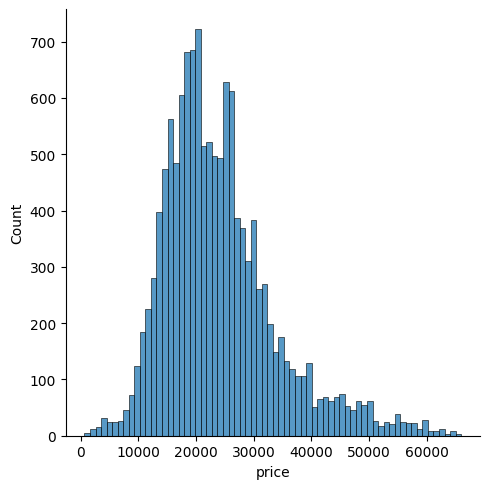

In [173]:
sbn.displot(yuzdeDoksanDokuzDf["price"])

In [174]:
arabaDataFrame.select_dtypes(include="number").groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [175]:
yuzdeDoksanDokuzDf.select_dtypes(include="number").groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [176]:
arabaDataFrame[arabaDataFrame.year != 1970].select_dtypes(include = "number").groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [177]:
arabaDataFrame = yuzdeDoksanDokuzDf

In [178]:
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [179]:
arabaDataFrame = arabaDataFrame[arabaDataFrame.year != 1970]

In [180]:
arabaDataFrame.select_dtypes(include="number").groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [181]:
arabaDataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [182]:
arabaDataFrame = arabaDataFrame.drop("transmission",axis=1)

In [183]:
arabaDataFrame

,year,price,mileage,tax,mpg,engineSize
5779,2020,65990,999,145,28.0,4.0
6177,2019,65990,5076,150,30.4,3.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
12594,2004,1495,119000,300,34.5,1.8
11549,2002,1495,13800,305,39.8,2.7
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


MODEL OLUŞTURMA

In [184]:
y = arabaDataFrame["price"].values

In [185]:
x = arabaDataFrame.drop("price",axis=1).values

In [186]:
print("x: \n",x)
print("y: \n",y)

x: 
 [[2.02000e+03 9.99000e+02 1.45000e+02 2.80000e+01 4.00000e+00]
 [2.01900e+03 5.07600e+03 1.50000e+02 3.04000e+01 3.00000e+00]
 [2.02000e+03 3.99900e+03 1.45000e+02 2.80000e+01 4.00000e+00]
 ...
 [2.00000e+03 8.70000e+04 2.65000e+02 2.72000e+01 3.20000e+00]
 [2.01000e+03 1.16126e+05 1.45000e+02 5.43000e+01 2.00000e+00]
 [2.00300e+03 1.09090e+05 2.35000e+02 4.00000e+01 1.40000e+00]]
y: 
 [65990 65990 65980 ...  1490  1350   650]


In [187]:
from sklearn.model_selection import train_test_split

In [223]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [224]:
len(arabaDataFrame)

12987

In [225]:
len(x_train)

9090

In [226]:
len(y_train)

9090

SCALER

In [227]:
from sklearn.preprocessing import MinMaxScaler

In [228]:
scaler = MinMaxScaler()

In [229]:
x_train = scaler.fit_transform(x_train)

In [230]:
x_test = scaler.transform(x_test)

MODEL OLUŞTURMA

In [231]:
from tensorflow.keras.models import Sequential

In [232]:
from tensorflow.keras.layers import Dense

In [233]:
# KATMAN SAYISINI SHAPE GÖRE VEREBİLİRİZ

In [234]:
x_train.shape

(9090, 5)

In [235]:
# MODEL OLUŞTURALIM
model = Sequential()

In [236]:
# GİZLİ KATMANLAR
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

In [237]:
# ÇIKIŞ KATMANI
model.add(Dense(1))

In [238]:
model.compile(optimizer="adam",loss="mse")

In [239]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 673241856.0000 - val_loss: 688101632.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 668489600.0000 - val_loss: 688046144.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 668036288.0000 - val_loss: 687748608.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 690898752.0000 - val_loss: 686336384.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 665748928.0000 - val_loss: 680886592.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 659163904.0000 - val_loss: 664094080.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 631195392.0000 - val_loss: 621119744.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 586524672.0000 - val_loss: 529317664.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 477394560.0000 - val_loss: 375026016.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 320426976.0000 - val_loss: 1979

GRAFİĞE DÖKME

In [242]:
kayipVeri = pd.DataFrame(model.history.history)

In [243]:
kayipVeri.head()

,loss,val_loss
0,672144192.0,688101632.0
1,672116992.0,688046144.0
2,671980032.0,687748608.0
3,671295296.0,686336384.0
4,668373824.0,680886592.0


<Axes: >

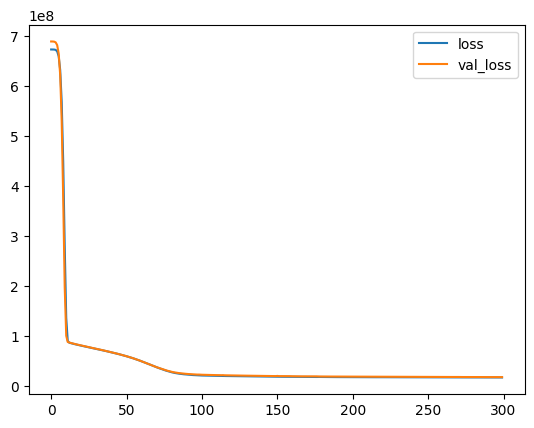

In [244]:
kayipVeri.plot()

In [248]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [252]:
tahminDizisi = model.predict(x_test)
tahminDizisi

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[23192.682],
       [22450.238],
       [25745.36 ],
       ...,
       [26079.672],
       [15809.594],
       [29182.207]], dtype=float32)

In [253]:
mean_absolute_error(y_test,tahminDizisi)

3072.7734375

In [254]:
mean_squared_error(y_test,tahminDizisi)

18326490.0

In [259]:
arabaDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


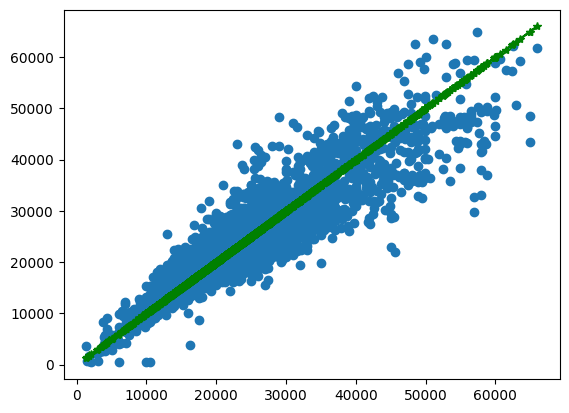

In [262]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [263]:
arabaDataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [267]:
yeniAraabaSeries = arabaDataFrame.drop("price",axis=1).iloc[2]

In [268]:
type(yeniAraabaSeries)

pandas.core.series.Series

In [269]:
yeniAraabaSeries = scaler.transform(yeniAraabaSeries.values.reshape(-1,5))

In [270]:
model.predict(yeniAraabaSeries)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


array([[60902.22]], dtype=float32)